In [1]:
import pandas as pd

DATASET_FILE = "../data/train.csv"

In [2]:
from disaster_tweets.sklearn_models import get_dataset

train_data, test_data = get_dataset(DATASET_FILE)

In [3]:
# Convert text into words.
def tokenize(text):
    return text.split()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

DEFAULT_WEIGHTS = {"text": 1, "keyword": 0, "location": 0}

# Define our pipeline.
def create_pipeline(classifier, vectorizer=CountVectorizer, weights=None):
    steps = [
        (
        "column", ColumnTransformer(
            [
                ("text", vectorizer(tokenizer=tokenize, preprocessor=None, lowercase=False), "text"),
                ("keyword", OneHotEncoder(handle_unknown="ignore"), ["keyword"]),
                ("location", OneHotEncoder(handle_unknown="ignore"), ["location"]),
            ],
            remainder="drop",
            transformer_weights=weights if weights else DEFAULT_WEIGHTS,
        ))
    ]
    
    steps.append(("classifier", classifier))
    return Pipeline(steps)

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Build a simple classifier.
classifier = create_pipeline(DecisionTreeClassifier())

In [6]:
# Train out model.
%time classifier.fit(train_data, train_data["target"])

CPU times: user 1.44 s, sys: 427 µs, total: 1.44 s
Wall time: 1.44 s


Pipeline(steps=[('column',
                 ColumnTransformer(transformer_weights={'keyword': 0,
                                                        'location': 0,
                                                        'text': 1},
                                   transformers=[('text',
                                                  CountVectorizer(lowercase=False,
                                                                  tokenizer=<function tokenize at 0x7f57697361f0>),
                                                  'text'),
                                                 ('keyword',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['keyword']),
                                                 ('location',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['location'])])),
             

In [7]:
predictions = classifier.predict(test_data)
predictions

array([0, 1, 0, ..., 0, 0, 1])

In [8]:
from sklearn.metrics import classification_report

print(classification_report(test_data["target"], predictions))
report = classification_report(test_data["target"], predictions, output_dict=True)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       860
           1       0.72      0.61      0.66       663

    accuracy                           0.73      1523
   macro avg       0.73      0.72      0.72      1523
weighted avg       0.73      0.73      0.73      1523



In [9]:
report_df = pd.DataFrame(report).transpose()[["precision", "recall", "f1-score"]]
report_df

,precision,recall,f1-score
0,0.732848,0.819767,0.773875
1,0.723708,0.612368,0.663399
accuracy,0.729481,0.729481,0.729481
macro avg,0.728278,0.716068,0.718637
weighted avg,0.728869,0.729481,0.725782


<AxesSubplot:>

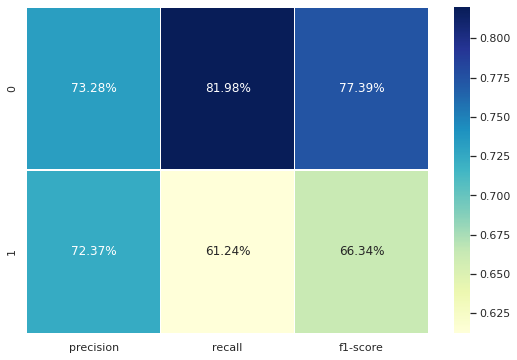

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(report_df.iloc[[0, 1]], annot=True, fmt=".2%", linewidths=.5, ax=ax, cmap="YlGnBu")